# <center>⚡️🏁 Quick start - тестируем простое решение</center>

In [1]:
import numpy as np
import pandas as pd

## Анализируем данные о машинах car_info

🚗 Главное описание машин с информацией о поломках для обучения / прогноза - `car_train.csv` / `car_test.csv`.

**Пояснение столбцов:**
- `car_id` - идентификатор машины
- `model` / `car_type` / `fuel_type`- марка, класс и тип топлива машины
- `car_rating` / `riders` - общий рейтинг  и общее число поездок к концу 2021-го кода.
- `year_to_start` / `year_to_work` - года выпуска машины и начала работы в автопарке
- `main_city` - город пребывания машины. (Москва или Питер)
- `target_reg` - количество дней до поломки.
- `target_class` - класс поломки (всего 9 видов)

(2337, 10)


car_id         model car_type fuel_type  car_rating  year_to_start  \
2010  b11219834D       VW Polo  economy    petrol        3.94           2015   
283   D-7559160p  Smart ForTwo  economy    petrol        4.92           2017   
1534  l-3474389b     Kia Rio X  economy    petrol        6.30           2015   

      riders  year_to_work  target_reg     target_class  
2010   75852          2016       54.69     engine_check  
283   130293          2016       26.43       gear_stick  
1534   80519          2020       33.79  engine_overheat

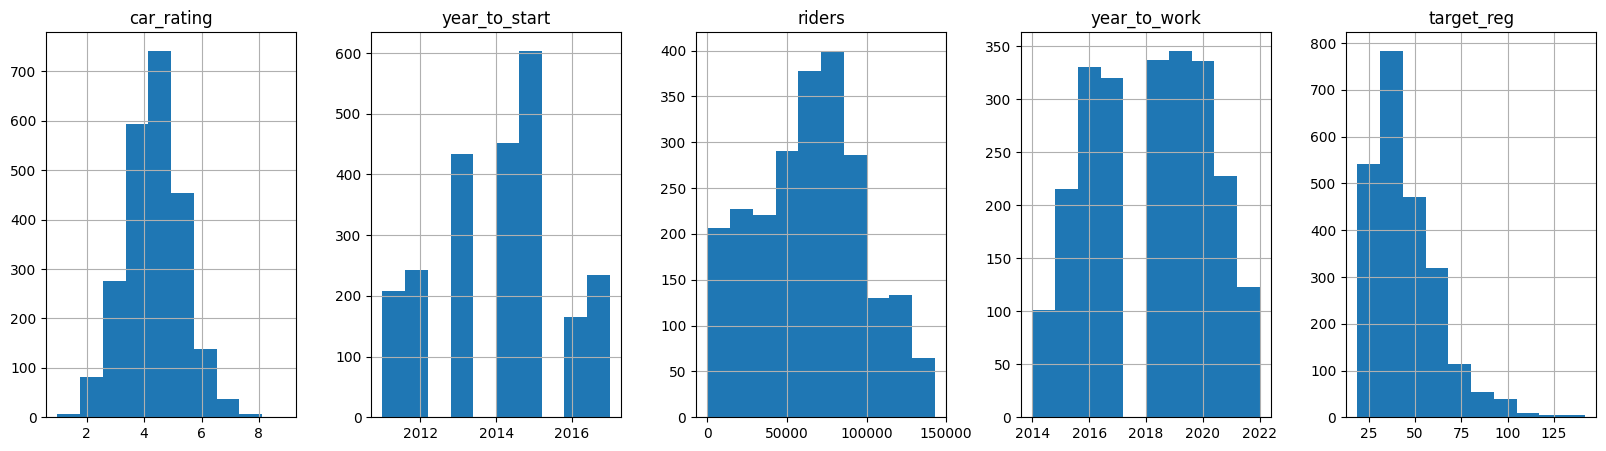

In [2]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
train = pd.read_csv(path)
print(train.shape)
train.hist(figsize=(20, 5), layout = (-1, 5))
train.sample(3)

In [3]:
train.describe()

car_rating  year_to_start         riders  year_to_work   target_reg
count  2337.000000    2337.000000    2337.000000   2337.000000  2337.000000
mean      4.354292    2014.040650   63711.443731   2018.069748    44.946735
std       0.996954       1.685852   33755.012096      2.159484    17.579568
min       0.980000    2011.000000      23.000000   2014.000000    18.920000
25%       3.740000    2013.000000   41053.000000   2016.000000    31.670000
50%       4.360000    2014.000000   64415.000000   2018.000000    40.170000
75%       5.000000    2015.000000   86515.000000   2020.000000    54.790000
max       8.900000    2017.000000  142862.000000   2022.000000   141.630000

In [4]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv'
test = pd.read_csv(path)
print(test.shape)
test.sample(3)

(1913, 8)


car_id           model  car_type fuel_type  car_rating  \
1638  y-7520188c    Kia Sportage  standart    petrol        3.28   
1656  r-1140095D  Nissan Qashqai  standart    petrol        4.78   
1120  n-7286817N  Renault Kaptur  standart    petrol        5.82   

      year_to_start  riders  year_to_work  
1638           2015   84202          2015  
1656           2015   79219          2021  
1120           2013   43890          2019

## Классифицируем признаки на типы

In [5]:
features2drop = ['car_id'] # то что надо выбросить
targets = ['target_class', 'target_reg'] # таргеты
cat_features = ['car_type', 'fuel_type', 'model'] # категориальные признаки

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]

print('cat_features :', len(cat_features), cat_features)
print('num_features :', len(num_features), num_features)
print('targets', targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 4 ['car_rating', 'year_to_start', 'riders', 'year_to_work']
targets ['target_class', 'target_reg']


## Обучаем Catboost и делаем прогноз на тест

In [6]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #, mean_squared_error

In [7]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 2.1911361	test: 2.1951349	best: 2.1951349 (0)	total: 72ms	remaining: 1m 11s
150:	learn: 1.6539682	test: 2.2440578	best: 2.1908935 (6)	total: 4.18s	remaining: 23.5s
300:	learn: 1.2455381	test: 2.3306861	best: 2.1908935 (6)	total: 5.96s	remaining: 13.8s
450:	learn: 0.9715368	test: 2.4008990	best: 2.1908935 (6)	total: 7.35s	remaining: 8.94s
600:	learn: 0.7541454	test: 2.4828758	best: 2.1908935 (6)	total: 8.75s	remaining: 5.81s
750:	learn: 0.5871863	test: 2.5655325	best: 2.1908935 (6)	total: 10.3s	remaining: 3.4s
900:	learn: 0.4696383	test: 2.6497783	best: 2.1908935 (6)	total: 14.7s	remaining: 1.61s
999:	learn: 0.4055238	test: 2.6994979	best: 2.1908935 (6)	total: 15.9s	remaining: 0us

bestTest = 2.19089351
bestIteration = 6

Shrink model to first 7 iterations.

 Accuracy: 0.0876068376068376


In [30]:
test['target_class'] = pd.Series(clf.predict(test[filtered_features]).reshape((-1, )), dtype=str)
# test[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v1.csv', index=False)
# print('CSV file saved!')

In [31]:
test.head()

car_id            model  car_type fuel_type  car_rating  year_to_start  \
0  P17494612l      Skoda Rapid   economy    petrol        4.80           2013   
1  N-1530212S  Renault Sandero  standart    petrol        4.32           2015   
2  B-1154399t     Smart ForTwo   economy    petrol        4.46           2015   
3  F12725233R    Smart ForFour   economy    petrol        2.80           2014   
4  l-1139189J      Skoda Rapid   economy    petrol        6.56           2013   

   riders  year_to_work     target_class  
0   42269          2019       gear_stick  
1   90014          2016  engine_overheat  
2   82684          2017      electro_bug  
3   68833          2021     engine_check  
4   42442          2021      another_bug

## Добавим информацию про поездки из rides_info


🏇 Информация про поездки - `rides_info.csv`.  **Пояснение столбцов:**
- `user_id` / `car_id` / `ride_id` - идентификаторы водителя, машины, поездки соответственно
- `ride_date` / `rating` - дата поездки и рейтинг, поставленный водителем
- `ride_duration` / `distance` / `ride_cost` -  длительность (время),  пройденное расстояние, стоимость поездки
- `speed_avg` / `speed_max` - средняя и максимальная скорости поездки соответственно
- `stop_times` / `refueling` - количество остановок (паузы) и флаг - была ли дозаправка.
- `user_ride_quality` - оценка манеры вождения машины водителя, определенная скоринговой ML системой сервиса.
- `deviation_normal` - общий показатель датчиков о состоянии машины, относительно эталонных показателей (нормы).


In [33]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv'
rides = pd.read_csv(path)
rides.sample(5)

user_id      car_id ride_id   ride_date  rating  ride_duration  \
379210  l17038343w  b-1088056N     k1m  2020-02-04    5.02             15   
401648  w36184812e  c12597990Y     w1K  2020-01-30    1.33             33   
563031  u70735646E  n21726530a     o1d  2020-03-16    4.64             29   
197983  j17036241T  N91717170a     B1V  2020-03-18    7.32              5   
380796  Z50971165Z  b-1448976u     B1x  2020-02-14    2.68          33875   

        ride_cost  speed_avg  speed_max  stop_times      distance  refueling  \
379210        158         37  57.516090           1  3.782130e+02          0   
401648        257         25  31.500107           0  8.224106e+02          0   
563031        226         53  79.000000           1  7.040739e+02          0   
197983         66         31  91.000000           1  3.005442e+01          0   
380796     541995         44  71.000000          11  1.516742e+06          0   

        user_ride_quality  deviation_normal  
379210           8.433435           -13.911  
401648          18.853827             9.973  
563031           9.329784            17.610  
197983          -4.804869            -6.499  
380796           9.128281            -3.511

In [34]:
f = lambda x: x.nunique()
rides_df_gr = rides.groupby('car_id', as_index=False).agg(mean_rating = ('rating', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'),
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', f))


rides_df_gr.head(2)

car_id  mean_rating  distance_sum  rating_min   speed_max  \
0  A-1049127W     4.255172  1.125753e+07         0.1  179.729652   
1  A-1079539w     4.088046  1.912765e+07         0.1  184.505566   

   user_ride_quality_median  deviation_normal_count  user_uniq  
0                 -0.288229                     174        172  
1                  2.508746                     174        173

In [35]:
def add_featues(df):

    if 'mean_rating' not in df.columns:
        return df.merge(rides_df_gr, on = 'car_id', how = 'left')

    return df


train = add_featues(train)
test = add_featues(test)

In [36]:
train.sample(2)

car_id            model car_type fuel_type  car_rating  \
91    R21058725x          Kia Rio  economy    petrol        3.18   
2187  Y-1109697o  Hyundai Solaris  economy    petrol        4.66   

      year_to_start  riders  year_to_work  target_reg     target_class  \
91             2011     109          2016       29.61  engine_overheat   
2187           2014   62452          2015       29.29      engine_fuel   

      mean_rating  distance_sum  rating_min   speed_max  \
91       3.979195  1.100278e+07         0.1  182.000000   
2187     4.021034  1.491832e+07         0.1  200.566183   

      user_ride_quality_median  deviation_normal_count  user_uniq  
91                   14.368673                     174        171  
2187                 -0.758671                     174        173

In [37]:
# train.to_csv('../tmp_data/quickstart_train.csv', index=False)

In [38]:
# test.to_csv('../tmp_data/quickstart_tra.csv', index=False)

# Снова обновляем типы фичей

In [39]:
filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print('num_features :', len(num_features), num_features)
print('cat_features :', len(cat_features), cat_features)
print('targets', targets)

num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
cat_features : 3 ['car_type', 'fuel_type', 'model']
targets ['target_class', 'target_reg']


# Обучаем Catboost на новых данных и делаем новый прогноз

In [40]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 1.8475119	test: 1.8655808	best: 1.8655808 (0)	total: 14.8ms	remaining: 14.8s
150:	learn: 0.3200590	test: 0.5547029	best: 0.5540463 (147)	total: 4.89s	remaining: 27.5s
300:	learn: 0.1971982	test: 0.5615205	best: 0.5513186 (167)	total: 6.72s	remaining: 15.6s
450:	learn: 0.1361985	test: 0.5694143	best: 0.5513186 (167)	total: 8.51s	remaining: 10.4s
600:	learn: 0.0986190	test: 0.5871706	best: 0.5513186 (167)	total: 10.3s	remaining: 6.81s
750:	learn: 0.0741270	test: 0.6001668	best: 0.5513186 (167)	total: 12s	remaining: 3.98s
900:	learn: 0.0588730	test: 0.6157155	best: 0.5513186 (167)	total: 13.8s	remaining: 1.51s
999:	learn: 0.0514613	test: 0.6249407	best: 0.5513186 (167)	total: 15s	remaining: 0us

bestTest = 0.5513186112
bestIteration = 167

Shrink model to first 168 iterations.

 Accuracy: 0.782051282051282


In [41]:
fi = clf.get_feature_importance(prettified=True)
fi

Feature Id  Importances
0                  speed_max    36.034645
1                mean_rating    30.903684
2                 rating_min    13.938537
3                      model     4.206258
4                   car_type     3.881288
5                  user_uniq     3.035950
6   user_ride_quality_median     2.097702
7               distance_sum     1.614279
8                     riders     1.347984
9                 car_rating     1.149331
10              year_to_work     1.127178
11             year_to_start     0.644968
12                 fuel_type     0.018196
13    deviation_normal_count     0.000000

In [43]:
test['target_class'] = pd.Series(clf.predict(test[filtered_features]).reshape((-1, )), dtype=str)
test[['car_id', 'target_class']].to_csv('../subs/simple_baseline.csv', index=False)
print('CSV file saved!')

CSV file saved!


# Summary
В этом уроке мы провели первичное исследование датасета: построили несколько прастых гистограм, проклассифицировали типы, и пообучали CatBoost

# Что дальше? Зашли решение на Kaggle

- Нажимаем `Save Version`
- Проверяем, что в `Advanced Settings` выбрано - всегда сохранять результаты ноутбука.
- Тип сохранения `Save & Run All (Commit)`
- Жмем окончательно кнопку `Save`